In [6]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [7]:
df = pd.read_csv('BTC_Trial_NB.csv')

In [8]:
df.index = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.head()

,Date,Month,Year,VOL1,VOL7,VOL30,ClosePrice,OpenPrice,HighPrice,LowPrice,...,SP500,RUSSELL,Oil,Gold,Silver,USDEUR,USDYUAN,Interest Rate,Economic Uncertainty,Crypto Index
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-04,04/02/2018,2,2018,0.058984,0.104624,0.204218,8277.01,9175.70,9334.87,8031.22,...,2648.94,1491.09,64.18,1336.5,16.71,0.80,6.30,1.80,0.234505,30
2018-02-05,05/02/2018,2,2018,0.082982,0.130688,0.219808,6955.27,8270.54,8364.84,6756.68,...,2648.94,1491.09,64.18,1336.5,16.67,0.80,6.31,1.80,0.248054,15
2018-02-06,06/02/2018,2,2018,0.041061,0.134668,0.221316,7754.00,7051.75,7850.70,6048.26,...,2695.14,1507.17,63.48,1329.5,16.58,0.81,6.29,1.82,0.223228,40
2018-02-07,07/02/2018,2,2018,0.041213,0.136422,0.222866,7621.30,7755.49,8509.11,7236.79,...,2681.66,1507.97,61.91,1314.6,16.24,0.81,6.28,1.85,0.201785,24
2018-02-08,08/02/2018,2,2018,0.030796,0.130387,0.222486,8265.59,7637.86,8558.77,7637.86,...,2581.00,1463.79,61.30,1319.0,16.34,0.82,6.27,1.85,0.183604,11


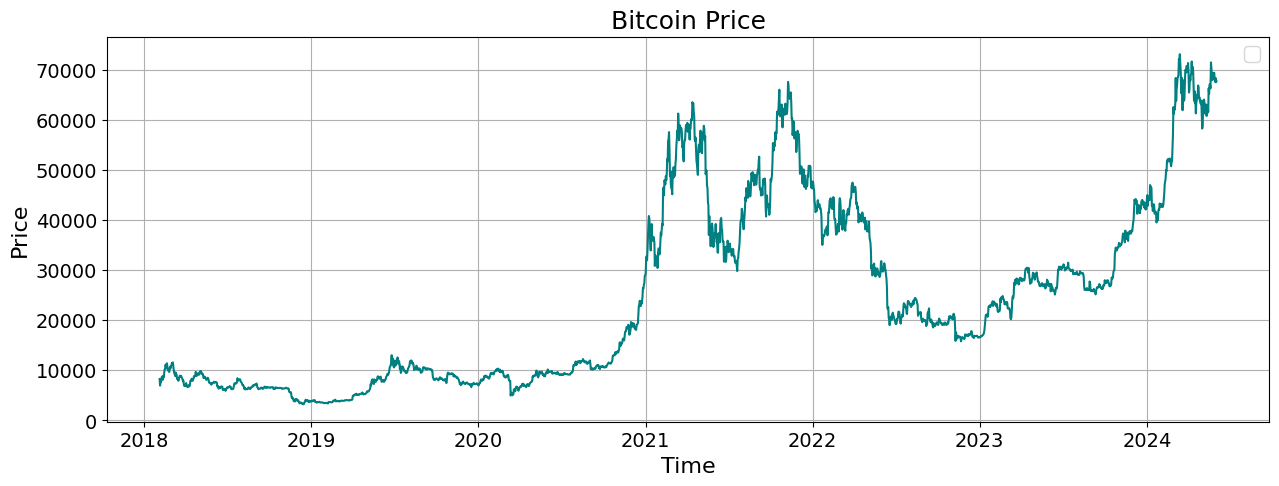

In [9]:
df_close = df['ClosePrice ']
plt.figure(figsize=(15,5))
plt.plot(df_close.index, df_close, color='teal')
plt.title('Bitcoin Price', fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

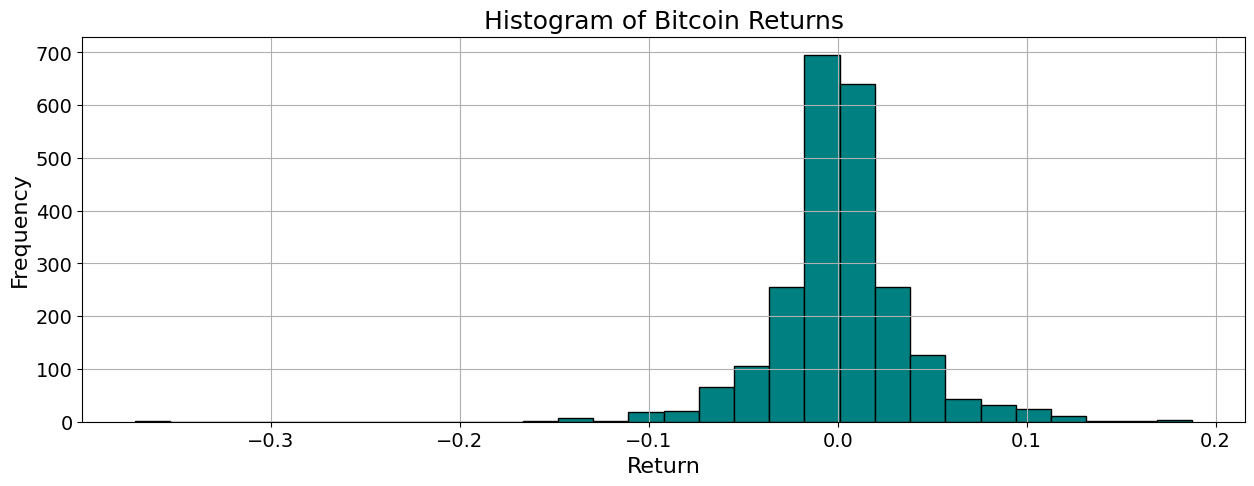

In [10]:
# Calculate the returns
returns = df_close.pct_change().dropna()  # Use percentage change and drop NaN values

# Plot the histogram
plt.figure(figsize=(15,5))
plt.hist(returns, bins=30, color='teal', edgecolor='black')
plt.title('Histogram of Bitcoin Returns', fontsize=18)
plt.xlabel('Return', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

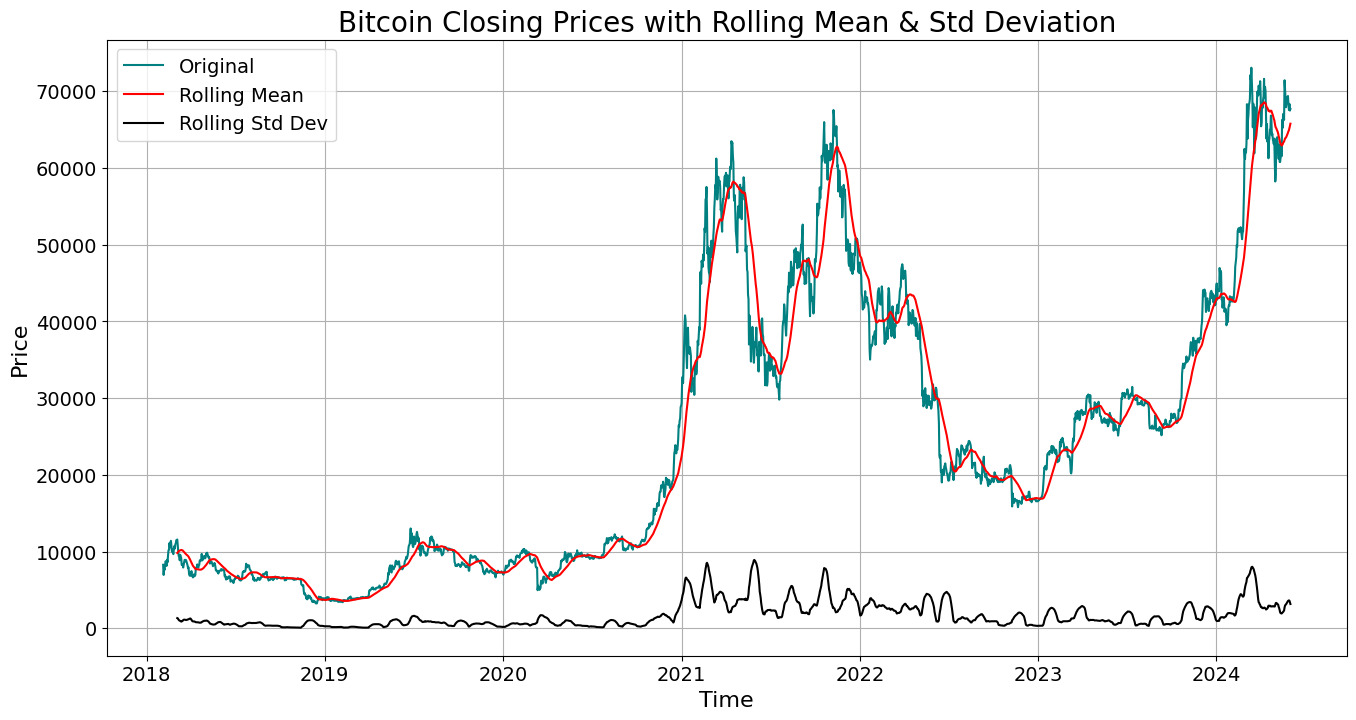

In [11]:
import matplotlib.pyplot as plt

# Calculate rolling statistics
rolling_mean = df_close.rolling(window=30).mean()
rolling_std = df_close.rolling(window=30).std()

# Plot the original series, rolling mean, and rolling std deviation
plt.figure(figsize=(16,8))
plt.plot(df_close, color='teal', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std Dev')
plt.title('Bitcoin Closing Prices with Rolling Mean & Std Deviation', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()


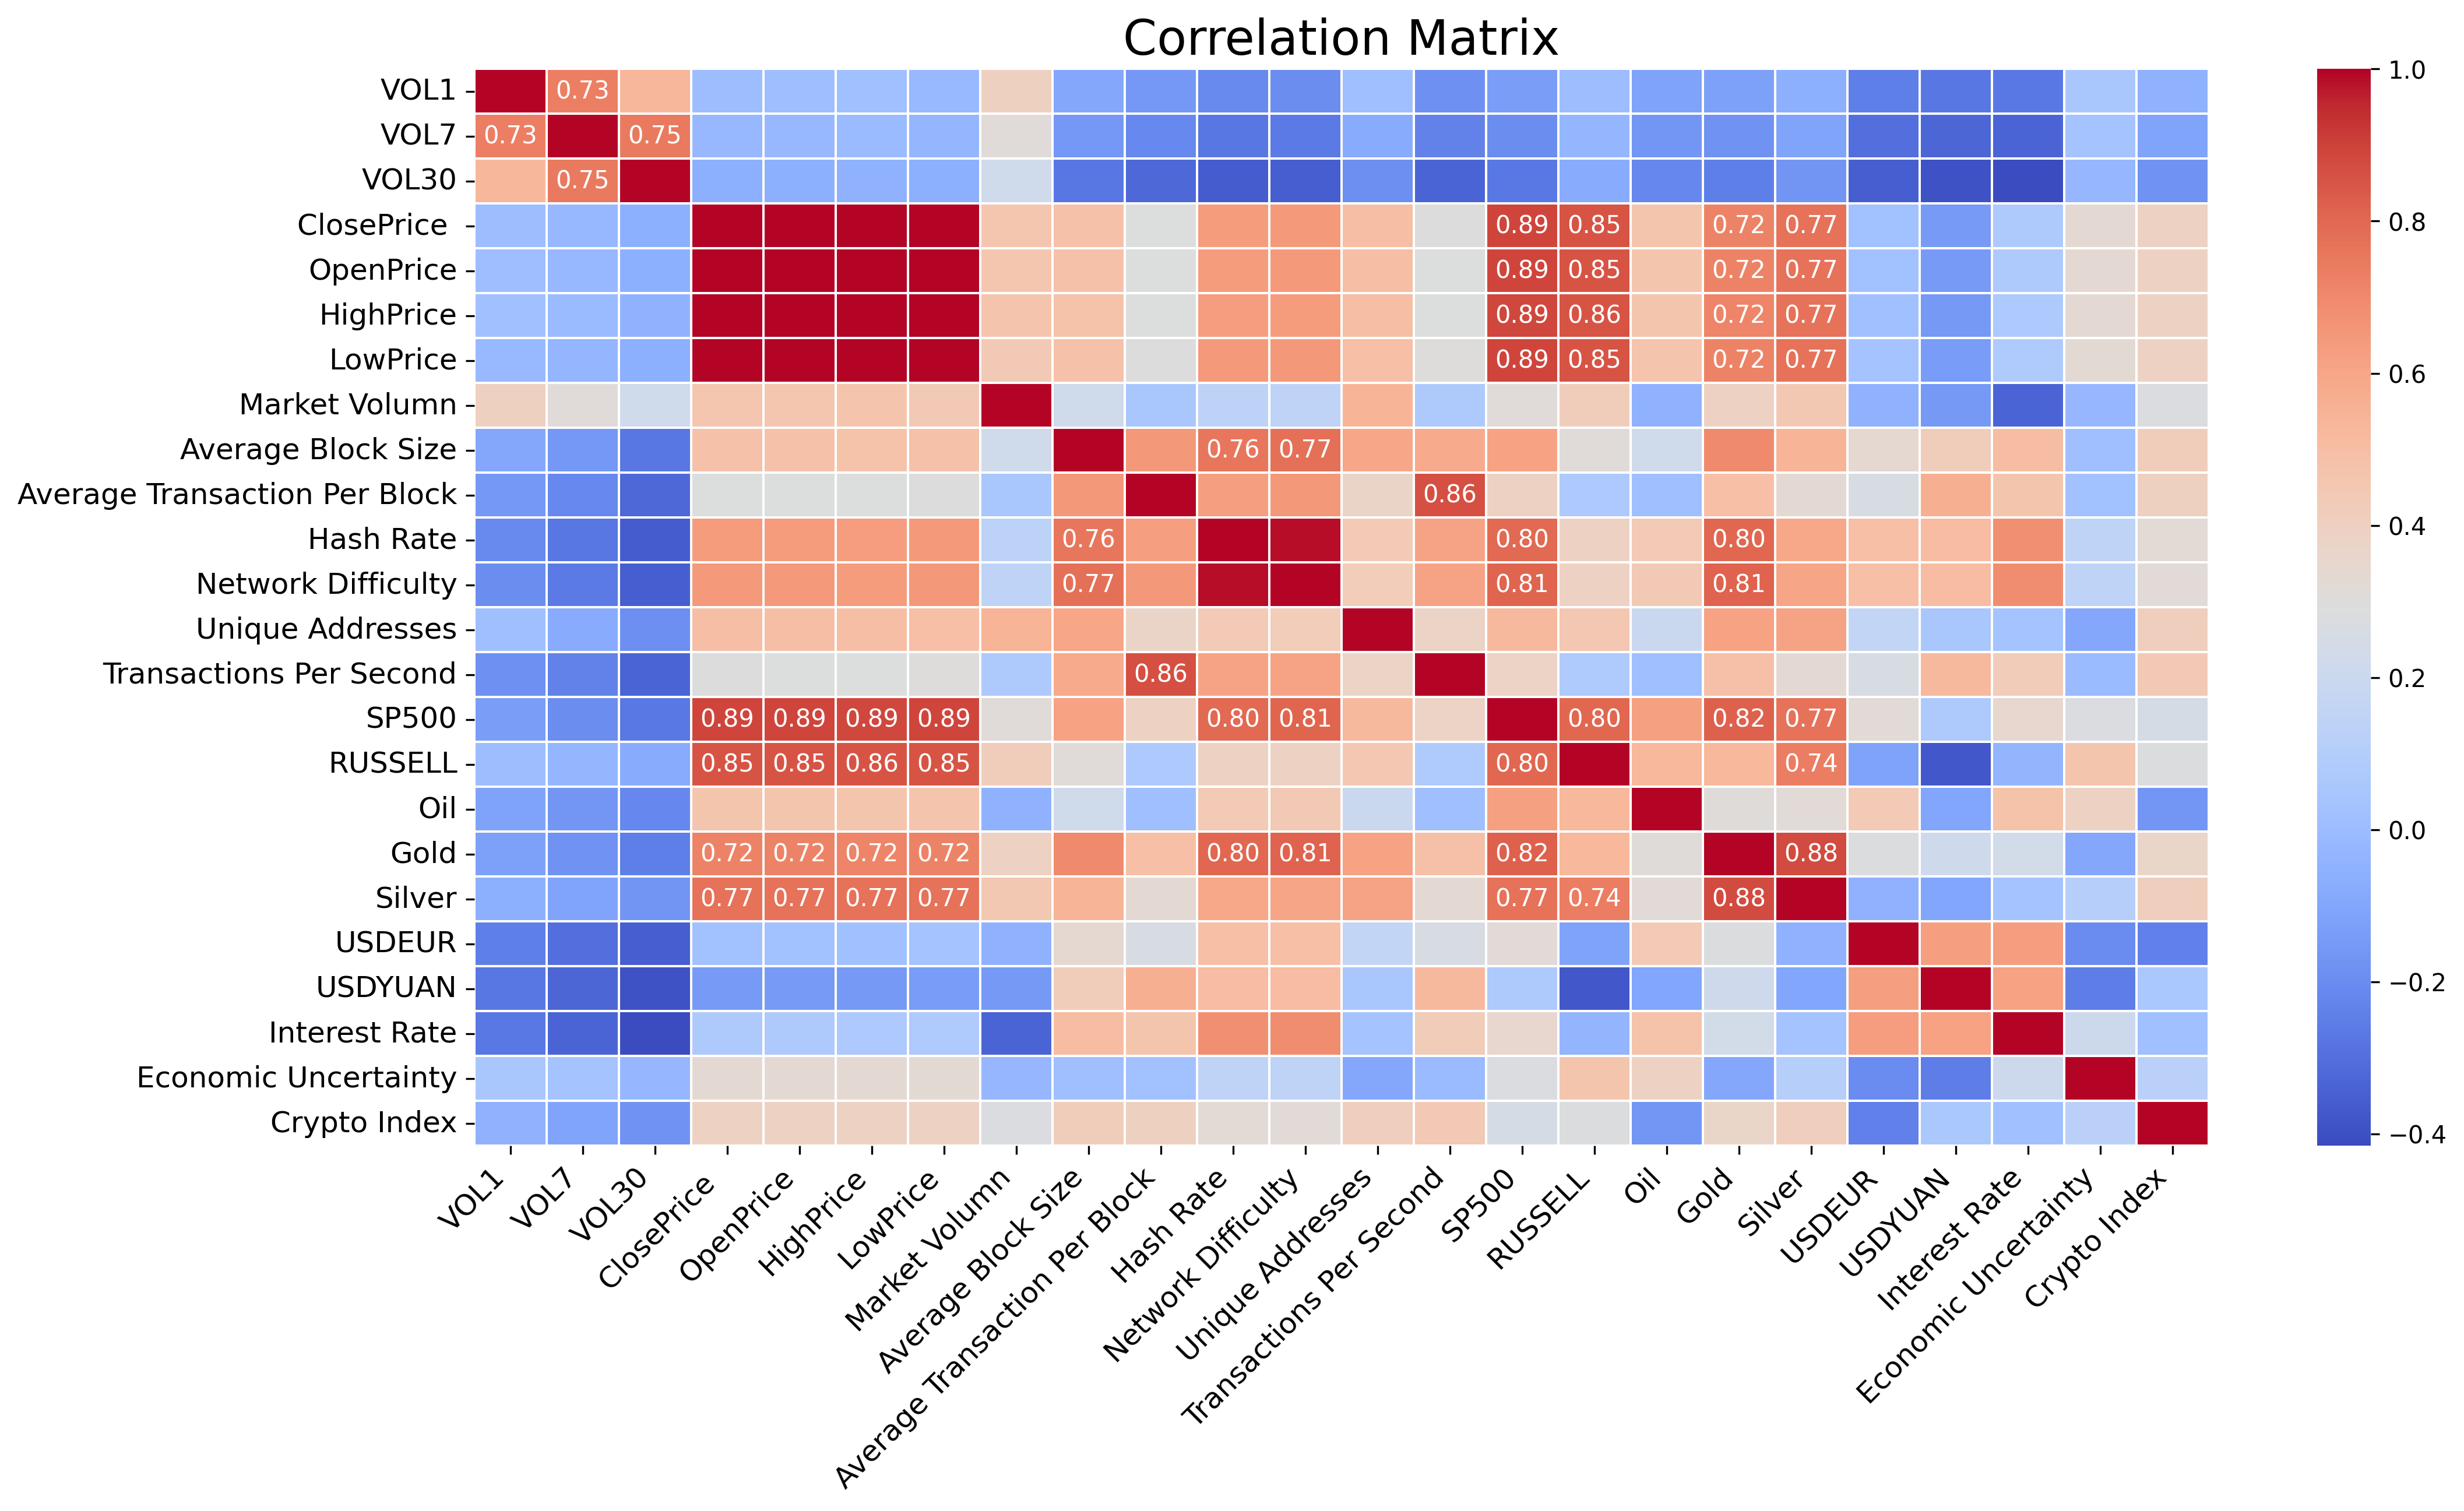

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame setup (assuming df is your DataFrame)
# df = pd.read_csv('your_data.csv')  # Load your DataFrame if not already done

# Drop non-numeric columns if necessary
df_cleaned = df.drop(columns=['Date', 'Month', 'Year'], errors='ignore')

# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Define a function to format annotations
def format_annotation(value):
    if 0.7 <= value <= 0.95:
        return f'{value:.2f}'
    else:
        return ''  # No annotation for values outside the specified range

# Apply the function to create a DataFrame of formatted annotations
annotation_matrix = correlation_matrix.applymap(format_annotation)

# Plot the heatmap with the customized annotations
plt.figure(figsize=(16, 8),dpi = 300)
sns.heatmap(correlation_matrix, annot=annotation_matrix, cmap='coolwarm', fmt='', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=45,ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


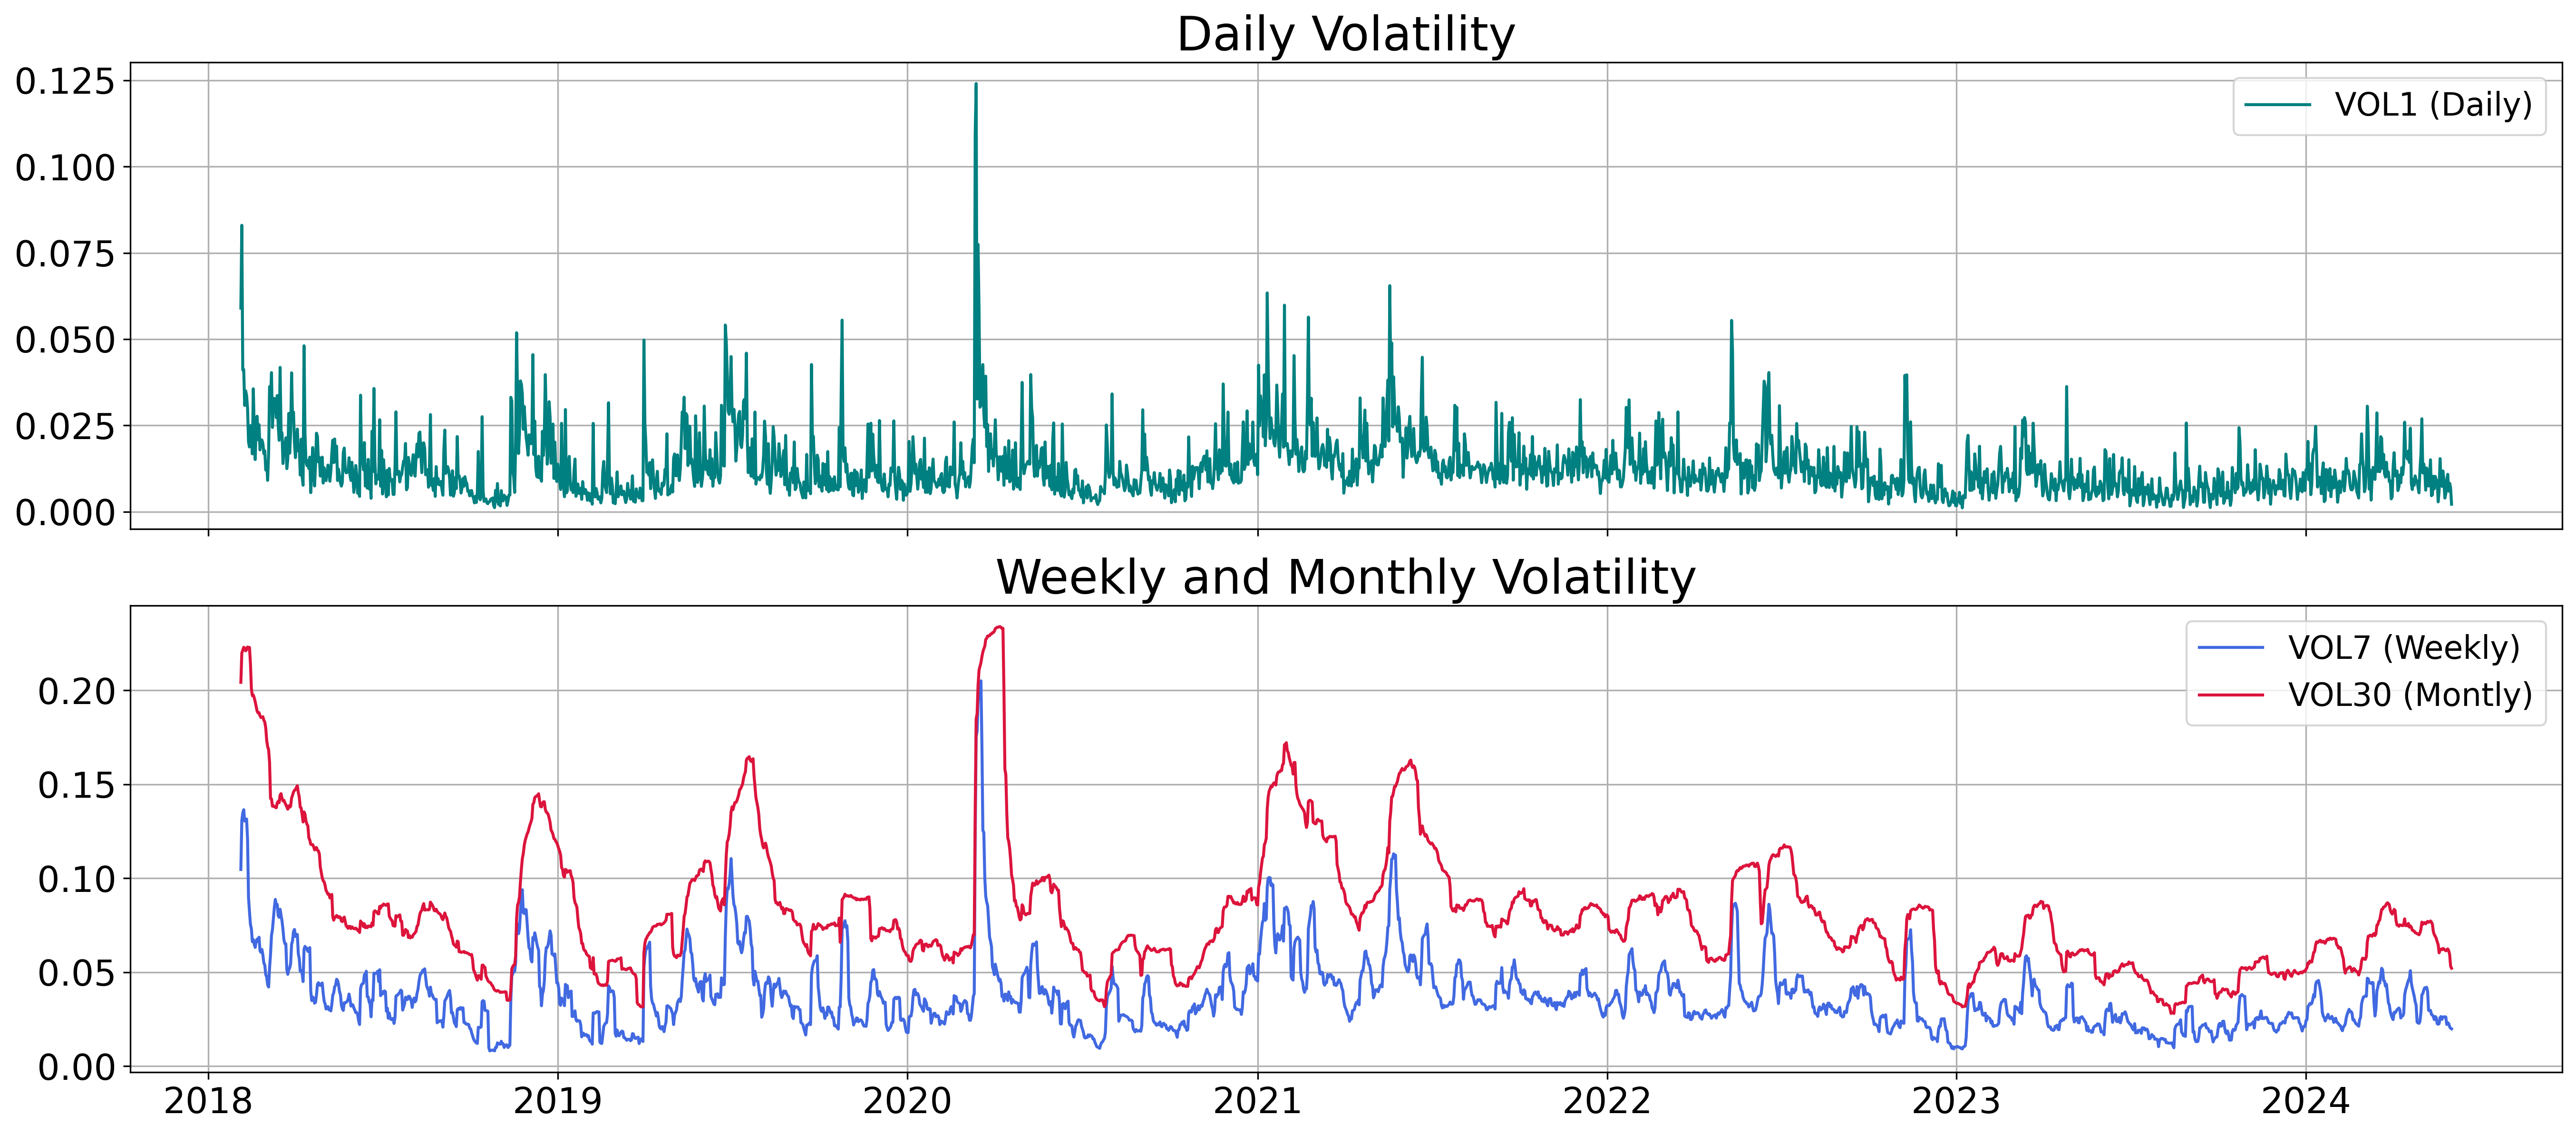

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 1 column
fig, axs = plt.subplots(2, 1, figsize=(18, 8), gridspec_kw={'height_ratios': [1, 1]}, sharex=True, dpi = 300)

# Plot Daily Volatility (top row, full width)
axs[0].plot(df.index, df['VOL1'], label='VOL1 (Daily)', color='teal')
axs[0].set_title('Daily Volatility', fontsize=24)
axs[0].legend(fontsize=16)
axs[0].grid(True)
axs[0].tick_params(axis='both', which='major', labelsize=18)  # Increase tick label size

# Plot Weekly and Monthly Volatility (bottom row, stacked)
# Create a new axis for Weekly and Monthly volatility, sharing x-axis
ax_bottom = axs[1]
ax_bottom.set_title('Weekly and Monthly Volatility', fontsize=24)
ax_bottom.grid(True)
ax_bottom.tick_params(axis='both', which='major', labelsize=14)  # Increase tick label size

# Plot Weekly Volatility on the bottom axis
ax_bottom.plot(df.index, df['VOL7'], label='VOL7 (Weekly)', color='royalblue')
# Plot Monthly Volatility on the bottom axis
ax_bottom.plot(df.index, df['VOL30'], label='VOL30 (Montly)', color='crimson')

# Add legend to the bottom plot
ax_bottom.legend(fontsize=16)

# Adjust layout
plt.tight_layout()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()
